# *PROYECTO FINAL SISTEMAS INTELIGENTES*

---


## *DETECCIÓN DE LA EDAD, GÉNERO Y ETNIA DE LA PERSONA*

##Obtención de los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importamos las librerías necearias para el modelo
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/age_gender.csv')

In [ ]:
## Convertimos los pixeles en un numpy array
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [ ]:
#Mostramos la cantidad total de columnas y de filas
print('Total de filas: {}'.format(len(data)))
print('Total de columnas: {}'.format(len(data.columns)))

Total de filas: 23705
Total de columnas: 5


###Normalización de los pixeles de los datos

In [ ]:
data['pixels'] = data['pixels'].apply(lambda x: x/255.0)

##Exploramos el dataset viendo la distribución de datos

In [ ]:
#Primero obtenemos los valores de cada categoría del modelo
dist_edad = data['age'].value_counts()
dist_etnia = data['ethnicity'].value_counts()
dist_genero = data['gender'].value_counts().rename(index={0:'Hombre',1:'Mujer'})

#Creamos una función que reciba como parámetros los datos de x,y, título de la categoría a analizar
def grafico_dist(x,y,titulo):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=titulo)
    fig.show()

###Distribución de edad

In [ ]:
grafico_dist(x=dist_edad.index, y=dist_edad.values, titulo='Distribucion de Edad')

###Distribucion de Etnias

In [ ]:
grafico_dist(x=dist_etnia.index, y=dist_etnia.values, titulo='Distribucion de Etnias')

###Distribución de Género

In [ ]:
grafico_dist(x=dist_genero.index, y=dist_genero.values, titulo='Distribucion de Género')

###Conversión de las imágenes de 1D a 3D

In [ ]:
X = np.array(data['pixels'].tolist())
X = X.reshape(X.shape[0],48,48,1)

##Vista de las imágenes

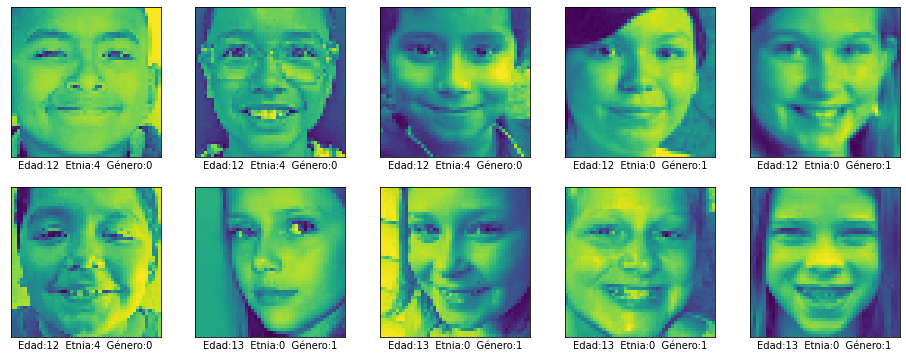

In [ ]:
plt.figure(figsize=(16,16))
for i in range(1500,1510):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Edad:"+str(data['age'].iloc[i])+
        "  Etnia:"+str(data['ethnicity'].iloc[i])+
        "  Género:"+ str(data['gender'].iloc[i])
    )
plt.show()

#Modelo para la predicción del Género

###Datos para Train y Test

In [ ]:
# División de los datos en Train y Test
y = data['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=37)

###Creación y entrenamiento del modelo

In [ ]:
modelGenero = keras.Sequential([
    keras.layers.InputLayer(input_shape=(48,48,1)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(1, activation='sigmoid')
])

modelGenero.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])


modelGenero.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                      

In [ ]:
modelGenero.fit(X_train, y_train, epochs=20, batch_size=64, validation_split = 0.1, verbose =1)

Epoch 1/20
260/260 [==============================] - 80s 307ms/step - loss: 0.2673 - accuracy: 0.8879 - val_loss: 0.2818 - val_accuracy: 0.8718
Epoch 2/20
260/260 [==============================] - 71s 274ms/step - loss: 0.2591 - accuracy: 0.8905 - val_loss: 0.2810 - val_accuracy: 0.8772
Epoch 3/20
260/260 [==============================] - 62s 239ms/step - loss: 0.2529 - accuracy: 0.8899 - val_loss: 0.2829 - val_accuracy: 0.8772
Epoch 4/20
260/260 [==============================] - 67s 256ms/step - loss: 0.2481 - accuracy: 0.8931 - val_loss: 0.2717 - val_accuracy: 0.8843
Epoch 5/20
260/260 [==============================] - 59s 226ms/step - loss: 0.2397 - accuracy: 0.8989 - val_loss: 0.2648 - val_accuracy: 0.8897
Epoch 6/20
260/260 [==============================] - 61s 234ms/step - loss: 0.2383 - accuracy: 0.9005 - val_loss: 0.2630 - val_accuracy: 0.8870
Epoch 7/20
260/260 [==============================] - 59s 226ms/step - loss: 0.2334 - accuracy: 0.9013 - val_loss: 0.2635 - val_ac

In [ ]:
#Se hace el testeo, aplica el modelo sobre nuevos datos que no se usaron en el entrenamiento, es decir sobre los datos de testeo para mostrar
# el Loss y Accuracy
loss, acc = modelGenero.evaluate(X_test,y_test,verbose=0)
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test Loss: 0.23793746531009674
Test Accuracy: 0.897430956363678


In [ ]:
modelGenero.save("predecir_genero.h5") ##Guardamos el modelo

# Modelo para la predicción de la Edad

###Datos para train y test

In [ ]:
y = data['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=37)

###Creación y entrenamiento del modelo

In [ ]:
modelEdad = keras.Sequential([
    keras.layers.InputLayer(input_shape=(48,48,1)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),

    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1, activation='relu')
])

sgd = tf.keras.optimizers.SGD(momentum=0.9)

modelEdad.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

modelEdad.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                      

In [ ]:
#Ajustamos los datos y entrenamos el modelo
modelEdad.fit(X_train, y_train, epochs=20, validation_split=0.1, batch_size=64, verbose=1)

Epoch 1/20
260/260 [==============================] - 70s 271ms/step - loss: 281.0179 - mae: 12.8327 - val_loss: 1048.2495 - val_mae: 26.5493
Epoch 2/20
260/260 [==============================] - 72s 275ms/step - loss: 196.4920 - mae: 10.5387 - val_loss: 489.3684 - val_mae: 16.8212
Epoch 3/20
260/260 [==============================] - 72s 276ms/step - loss: 166.6969 - mae: 9.6259 - val_loss: 272.6677 - val_mae: 12.2714
Epoch 4/20
260/260 [==============================] - 70s 271ms/step - loss: 148.5852 - mae: 9.0611 - val_loss: 112.2103 - val_mae: 7.7918
Epoch 5/20
260/260 [==============================] - 72s 278ms/step - loss: 142.9070 - mae: 8.8737 - val_loss: 115.8435 - val_mae: 7.8087
Epoch 6/20
260/260 [==============================] - 72s 278ms/step - loss: 140.1096 - mae: 8.7711 - val_loss: 117.1937 - val_mae: 7.8050
Epoch 7/20
260/260 [==============================] - 71s 272ms/step - loss: 126.9583 - mae: 8.3233 - val_loss: 115.6681 - val_mae: 7.7534
Epoch 8/20
260/260 [=

In [ ]:
#Se hace el testeo, aplica el modelo sobre nuevos datos que no se usaron en el entrenamiento, es decir sobre los datos de testeo para mostrar
# el Loss y Accuracy
loss, acc = modelEdad.evaluate(X_test,y_test,verbose=0)
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test Loss: 117.77723693847656
Test Accuracy: 8.131953239440918


In [ ]:
 ##Guardamos el modelo
modelEdad.save("predecir_edad.h5")

# Modelo para la predicicón de la Etnia

###Datos para train y test

In [ ]:
y = data['ethnicity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=37)

###Creación y entrenamiento del modelo

In [ ]:
modelEtnia = keras.Sequential([
    keras.layers.InputLayer(input_shape=(48,48,1)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(5)
])

modelEtnia.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

modelEtnia.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6400)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [ ]:
#Ajustamos los datos y entrenamos el modelo
modelEtnia.fit(X_train, y_train, epochs=16, validation_split=0.1, batch_size=64, verbose=1)

Epoch 1/16
260/260 [==============================] - 50s 189ms/step - loss: 1.2291 - accuracy: 0.5304 - val_loss: 0.9475 - val_accuracy: 0.6890
Epoch 2/16
260/260 [==============================] - 47s 182ms/step - loss: 0.9828 - accuracy: 0.6451 - val_loss: 0.8568 - val_accuracy: 0.7069
Epoch 3/16
260/260 [==============================] - 47s 181ms/step - loss: 0.9093 - accuracy: 0.6854 - val_loss: 0.7654 - val_accuracy: 0.7334
Epoch 4/16
260/260 [==============================] - 47s 181ms/step - loss: 0.8570 - accuracy: 0.7058 - val_loss: 0.7517 - val_accuracy: 0.7366
Epoch 5/16
260/260 [==============================] - 49s 189ms/step - loss: 0.8130 - accuracy: 0.7176 - val_loss: 0.7487 - val_accuracy: 0.7572
Epoch 6/16
260/260 [==============================] - 49s 189ms/step - loss: 0.7811 - accuracy: 0.7296 - val_loss: 0.7052 - val_accuracy: 0.7474
Epoch 7/16
260/260 [==============================] - 47s 181ms/step - loss: 0.7476 - accuracy: 0.7394 - val_loss: 0.6734 - val_ac

In [ ]:
#Se hace el testeo, aplica el modelo sobre nuevos datos que no se usaron en el entrenamiento, es decir sobre los datos de testeo para mostrar
# el Loss y Accuracy
loss, acc = modelEtnia.evaluate(X_test,y_test,verbose=0)
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test Loss: 0.6328311562538147
Test Accuracy: 0.7912193536758423


In [ ]:
 ##Guardamos el modelo
 modelEtnia.save("predecir_etnia.h5") ##Guardamos el modelo

#Evaluamos los Modelos

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
#est

NewModelGenero = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks _ SISTEMAS INTELIGENTES/Modelos/predecir_genero.h5") #Cargar el modelo genero

NewModelEdad = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks _ SISTEMAS INTELIGENTES/Modelos/predecir_edad.h5") #Cargar el modelo edad

NewModelEtnia = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks _ SISTEMAS INTELIGENTES/Modelos/predecir_etnia.h5") #Cargar el modelo etnia

In [ ]:
plot_model(NewModelEdad)

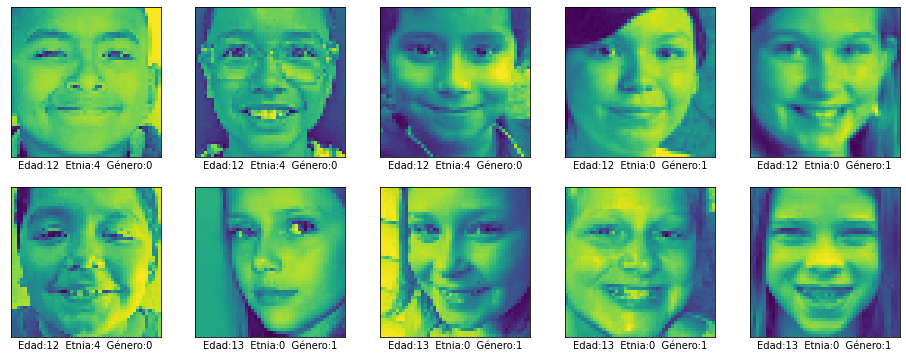

In [ ]:
plt.figure(figsize=(16,16))
for i in range(1500,1510):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Edad:"+str(data['age'].iloc[i])+
        "  Etnia:"+str(data['ethnicity'].iloc[i])+
        "  Género:"+ str(data['gender'].iloc[i])
    )
plt.show()

In [ ]:
def predict(modelo,img):
    predicion = np.argmax(modelo.predict(img),axis=1)
    return predicion

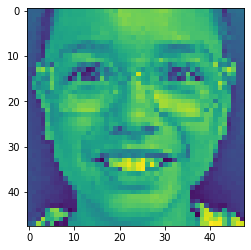

In [ ]:
value = 1501

img = data['pixels'].iloc[value].reshape(48,48)
plt.imshow(img)
plt.show()

In [ ]:
prediction = NewModelEdad.predict(data['pixels'].iloc[value].reshape(1,48,48,1))

print(prediction)

1/1 [==============================] - 0s 31ms/step
[[3.5598624]]


In [ ]:
img = img.reshape(1,48,48,1)

edad = np.argmax(NewModelEdad.predict(img),axis=1)

print(edad)

1/1 [==============================] - 0s 22ms/step
[0]


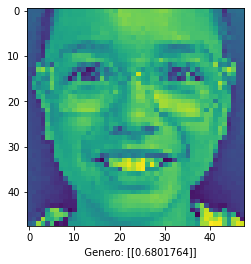

In [ ]:
img = img.reshape(48,48)

plt.imshow(img)
plt.xlabel(
    "   Genero: "+str()
)
plt.show()

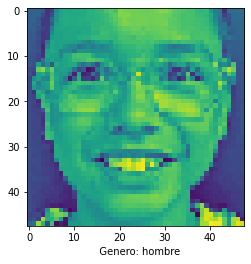

In [ ]:
img = img.reshape(48,48)

plt.imshow(img)
plt.xlabel(
    "   Genero: "+str(genero)
)
plt.show()

In [ ]:
img = img.reshape(1,48,48,1)

edad = predict(NewModelEdad,img)[0]
generos = ['hombre','mujer']
genero = generos[predict(NewModelGenero,img)[0]]
etnia = predict(NewModelEtnia,img)[0]

print(edad, genero, etnia)


1/1 [==============================] - 0s 72ms/step
0 hombre 0


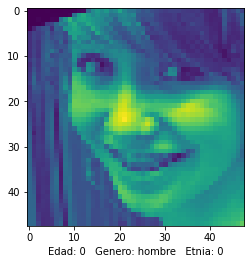

In [ ]:
img = img.reshape(48,48)

plt.imshow(img)
plt.xlabel(
    "Edad: "+str(edad)+
    #"   Genero: "+genero+
    "   Genero: "+str(genero)+
    "   Etnia: "+str(etnia)
)
plt.show()